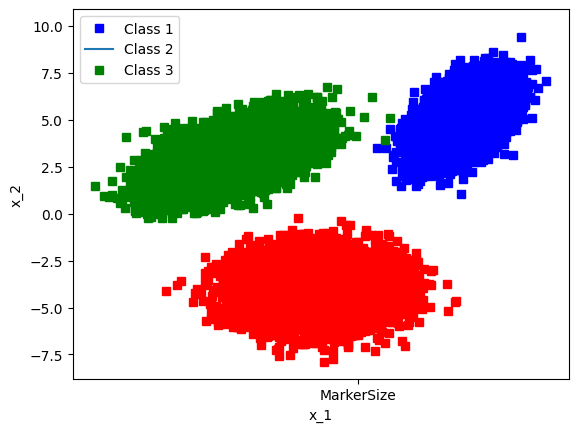

In [54]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

# In the following we sample from Gaussian distribution to generate 3 clusters
L = 10000;

mu_1 = np.array([5, 5]); # mean 
Sigma_1 = np.array([[1, 0.5],[ 0.5, 1]]); # covariance
X_1 = np.random.multivariate_normal(mu_1,Sigma_1,L); # drawing samples from 2D Gaussian ditribution

mu_2 = np.array([-2, -4]);
Sigma_2 = np.array([[3, 0], [0, 1]]);
X_2 = np.random.multivariate_normal(mu_2,Sigma_2,L);

mu_3 = np.array([-6, 3]);
Sigma_3 = np.array([[3, 1], [1, 1]]);
X_3 = np.random.multivariate_normal(mu_3,Sigma_3,L);


#figure
plt.plot(X_1[:,0],X_1[:,1],'bs','MarkerSize',10)
plt.plot(X_3[:,0],X_3[:,1],'gs','MarkerSize',10)
plt.plot(X_2[:,0],X_2[:,1],'rs','MarkerSize',10) 

plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(['Class 1','Class 2', 'Class 3'])
plt.show

# Calssification (2 classes)
C_1 = np.matlib.repmat([0,1],L,1); # generate labels for Class 1
C_2 = np.matlib.repmat([1,0],L,1); # generate labels for Class 2

C = np.concatenate((C_1,C_2))
X = np.concatenate((X_1,X_2))

# data set containing two classes
data_set = np.concatenate([X,C],1); # form the data set. Samples X_1 and X_2 belong to Class 1 and 2, respectivelly. 

rand_int = np.random.permutation(len(data_set)); # random vector generation
data_set = data_set[rand_int,:] # random shuffling of the data set.

# Data_set is a 20000x4 with
# x_1,x_2,c_1,c_2

In [100]:
# My code!
percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]

M = 2 # Numbr of inputs

W = np.array([np.ones(M+1),np.ones(M+1)]).T
for i in range(len(train_dataset)):
    x = np.array([1,train_dataset[i,0],train_dataset[i,1]])
    t = np.array([train_dataset[i,2],train_dataset[i,3]]).T
    y = W.T@x
    e = (x@W)
    print(e)

# x = np.array([np.ones(len(train_dataset)),train_dataset[:,0],train_dataset[:,1]]).T

# t = np.array([train_dataset[:,2],train_dataset[:,3]]).T
# print(t.shape)
# e = x@W - t
# print(e)


[9.41218759 9.41218759]
[7.37176036 7.37176036]
[-5.1681026 -5.1681026]
[12.03570091 12.03570091]
[-4.83737241 -4.83737241]
[-5.15851174 -5.15851174]
[8.44360172 8.44360172]
[-4.87442835 -4.87442835]
[-2.4606606 -2.4606606]
[12.55302478 12.55302478]
[-5.43155771 -5.43155771]
[-3.7716599 -3.7716599]
[11.82659694 11.82659694]
[-6.82203113 -6.82203113]
[10.04707744 10.04707744]
[10.27831302 10.27831302]
[11.2430987 11.2430987]
[11.26646504 11.26646504]
[12.47378372 12.47378372]
[-4.81056708 -4.81056708]
[-4.09103923 -4.09103923]
[11.1644509 11.1644509]
[-5.41372897 -5.41372897]
[10.85569321 10.85569321]
[-3.34093399 -3.34093399]
[12.14424222 12.14424222]
[11.9189784 11.9189784]
[-5.17347742 -5.17347742]
[12.78017429 12.78017429]
[-4.50907298 -4.50907298]
[-4.73390376 -4.73390376]
[8.56585552 8.56585552]
[-8.95957057 -8.95957057]
[11.72294797 11.72294797]
[9.73081631 9.73081631]
[12.3589414 12.3589414]
[8.40184543 8.40184543]
[-1.69473631 -1.69473631]
[12.26177829 12.26177829]
[13.28251474